# Chapter 5 - Understanding and Comparing Distributions

In [2]:
# %load ./snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

## Boxplots

* visual display of 5-Number Summary

### Steps

1. draw short horizontal lines at Q1, Median, and Q3; connect with vertical lines to form a box
2. construct 'fences' (not part of final display):
  * upper fence = $Q3 + 1.5 IQR$
  * lower fence = $Q1 - 1.5 IQR$
3. 'grow whiskers' by drawing lines from box ends to the most extreme data values found _within_ the fences.
4. display any values _outside_ fences as **outliers** with a special symbol; use a different symbol for _extreme_ outliers (>= 3 IQR beyond the quartiles)

### Interpretation

* box shows the middle half of the data; height = IQR
* median's location within box shows level of symmetry of middle half of data
* whisker length's show symmetry or skewness

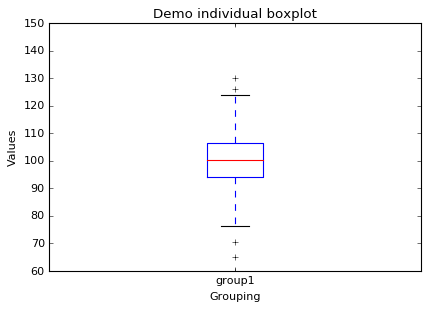

In [3]:
## NOTE: not using seaborn here because there appears to be a bug in 
##       its handling of outliers

# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
s = Series(np.random.normal(100, 10, 200))
s = s.append(Series([60, 65, 130, 150]))  # add a couple outliers

# Create the boxplot
plt.boxplot(s.values);
plt.xticks([1], ['group1'])
plt.xlabel("Grouping")
plt.ylabel("Values")
plt.title("Demo individual boxplot");

## Comparing Groups with Histograms

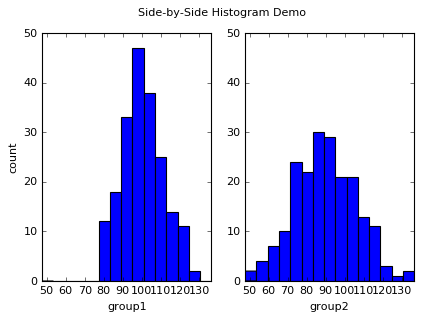

In [8]:
# matplotlib side-by-side histograms
s1 = Series(np.random.normal(100, 10, 200))
s2 = Series(np.random.normal(90, 15, 200))

# make the x axes consistent base on min/max across both groups
xlims = [min(s1.min(), s2.min()), max(s1.max(), s2.max())]
ymax = 50
bins = 15

# hist for group 1
plt.subplot(1,2,1)
plt.hist(s1, bins=bins, range=xlims) # explicitly setting bins & range keep displays consistent
plt.ylim([0, ymax])
plt.xlim(xlims)
plt.xlabel("group1")
plt.ylabel("count")

# hist for group 2
plt.subplot(1,2,2)
plt.hist(s2, bins=bins, range=xlims)
plt.ylim([0, ymax])
plt.xlim(xlims)
plt.xlabel("group2")

plt.suptitle("Side-by-Side Histogram Demo");

## Comparing Groups with Boxplots

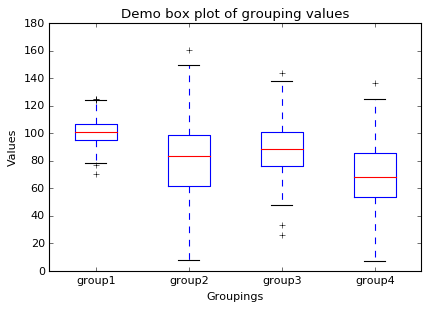

In [9]:
## create data
np.random.seed(10)
df = DataFrame(data = {
        "group1": Series(np.random.normal(100, 10, 200)),
        "group2": Series(np.random.normal(80, 30, 200)),
        "group3": Series(np.random.normal(90, 20, 200)),
        "group4": Series(np.random.normal(70, 25, 200))
    })

# Create the boxplot
plt.boxplot(df.values)
plt.xticks(range(1, len(df.columns) + 1), df.columns.values)
plt.xlabel("Groupings")
plt.ylabel("Values")
plt.title("Demo box plot of grouping values");

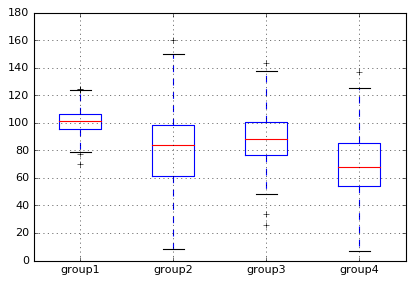

In [12]:
# using built-in pands support
df.boxplot();

## Step-by-Step Example

Comparing Groups

* plan: state what you want to find out
* variables: identify the variables and report the 'W's
* check appropriate conditions
* mechanics: report the 5-number summaries of each group; include the IQR
* visualize by showing side-by-side boxplots
* conclusion: interpret what the boxplots and summaries say in response to the stated goals
  - compare the shapes, centers, and spreads and not any outliers

## Outliers

* try to understand them in the context of the data
* are there gaps between the outlier and the rest of the data?, or is it part of a (relatively) continuous series of values that are outside the norm?
* some outliers are errors
  - if the _correct_ value can be identified, consider fixing the value, and noting the fix
* many outliers are not errors, but just _different_
* for non-error outliers, consider reporting summaries that _include_ and _exclude_ the outliers, and discuss the outliers in the analysis

* **don't** silently include outliers in the analysis - factor them into the discussion
* **don't** silently drop outliers from the analysis - discuss decision to drop outliers

## Timeplots

* **timeplot** : display of values against time

### Smoothing Timeplots

* a smooth trace can highlight long-term patterns and help see them through the more local variation
* example: **lowess**
* moving average
* exponential smoothing

## Re-Expressing Data

* useful when data is skewed, leading to difficulties in summarizing center and spread
* can **re-express** or **transform** the data by aplying a simple function to make the skewed distribution more symmetric
* skewed to right: might benefit from square root, log, or reciprocal
* skewed to left: might benefit from square

## What Can Go Wrong

* avoid inconsistent scales
* label clearly
* beware of outliers

## What Have We Learned

### Terms

* boxplot
* outlier
* far outlier
* comparing distributions
* comparing boxplots
* timeplot

### Skills

[p.96]